In [ ]:
!pip install gpytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 8.4 MB/s eta 0:00:00


In [ ]:
import torch
import gpytorch
import matplotlib.pyplot as plt
import numpy


Datos de entrenamiento

In [ ]:
train_x = torch.tensor([0.503084, 0.580724, 0.494795, 0.345928, 0.677662, 0.610712, 0.866494, 0.330932, 0.798566, 0.449562, 0.371443, 0.291718, 0.35582, 0.461274, 0.28361, 0.632234, 0.466414, 0.268624, 0.94689, 0.924917, 0.693165, 0.625233, 0.896944, 0.608261, 0.789054, 0.578292, 0.59028, 0.719626, 0.210032, 0.76659, 0.858513, 0.367904, 0.558746, 0.848509, 0.99639, 0.776594, 0.582932, 0.583743, 0.796552, 0.588721, 0.913473, 0.768587, 0.948455, 0.513793, 0.733609, 0.637701, 0.765588, 0.434861, 0.983407, 0.583743, 0.700631, 0.662058, 0.838126, 0.621874, 0.370586, 0.416632, 0.35857, 0.451681, 0.522762, 0.733996, 0.701965, 0.742008, 0.746118, 0.34956, 0.591835, 0.514746, 0.620632, 0.643646, 1.002795, 0.470586, 0.610643, 0.263487, 0.358336, 0.742697, 0.451556, 0.910752, 0.552605, 0.337534, 0.750681, 0.983777, 0.822697, 0.813696, 0.950763, 0.817732, 0.34052, 0.960751, 0.81072, 0.756687, 0.611252, 0.877971, 0.548325, 0.809032, 1.0288, 0.627239, 0.422452, 0.9339, 0.701158, 0.697164, 0.685179, 0.767075, 0.931901, 0.863978, 0.7491, 0.514353, 0.468406, 0.470398, 0.958871, 0.927909, 0.840522, 0.630699, 0.562751, 0.615698, 0.828528, 0.564741, 0.578745, 0.557743, 0.864497, 0.735608, 0.858507, 0.261984, 0.585743, 0.76158, 0.4888, 0.858516, 0.688656, 0.558743, 0.324532, 0.480704, 0.185371, 0.922221, 0.681942, 0.475707, 0.92221, 0.893183, 0.428646, 0.631882, 0.69996, 0.736007, 0.575823, 0.418633, 0.511746, 0.535771, 0.641893, 0.734996, 0.35156, 0.60986, 0.349557, 0.701969, 0.355261, 0.98328, 0.872152, 0.75903, 0.92622, 0.643642, 0.419569, 0.515587, 0.890729, 0.805696, 0.480568, 0.800697, 0.580604, 0.715652, 0.805695, 0.766684, 0.664638, 0.901736, 0.745665, 0.71868, 0.73669, 0.5796, 0.370531, 0.96074, 0.850729, 0.64864, 0.219462, 0.936755, 0.647639, 0.461564, 0.600603, 0.670654, 0.760698, 0.246492, 0.470573, 0.169455, 0.497379, 0.638234, 0.507371, 0.535327, 0.587285, 0.773081, 0.699166, 0.370511, 0.761089, 0.699169, 0.78806, 0.373513, 0.405478, 0.852994, 0.808048, 0.603272, 0.58329, 0.534335, 0.72014, 0.400485, 0.837004, 0.371508, 0.806041, 0.840005, 0.500728, 0.532765, 0.533766, 0.932229, 0.822103, 0.553797, 0.125298, 0.842123, 0.443668, 0.727675, 0.683659, 0.442548, 0.726679, 0.28251, 0.404549, 0.519611, 0.690652, 1.060801, 0.576612, 0.268489, 0.72068, 0.250498, 0.760691, 0.698167, 0.550315, 0.730128, 0.847985, 0.997826, 0.435446, 0.40947, 0.30159, 1.299106, 1.020807, 0.839734, 1.12085, 1.230892, 0.97423, 0.970782, 0.064229, 0.12903, 0.10289, 0.04413, 0.11304, 0.25611, 0.38026, 0.14547, 0.08889, 0.26059, 0.07891, 0.08304, 0.16565, 0.16817, 0.17063, 0.17028, 0.12044, 0.27653, 0.2316, 0.30569, 0.07997, 0.17415, 0.13868, 0.14607, 0.08133, 0.2338, 0.25655, 0.24562, 0.12593, 0.22351, 0.10264, 0.11967, 0.18055, 0.19709, 0.22916, 0.26451, 0.10337, 0.36441, 0.2056, 0.17981, 0.19959, 0.15653, 0.1618, 0.20953, 0.24179, 0.23646, 0.22668, 0.29678, 0.20852, 0.25104, 0.25012, 0.11771, 0.21971, 0.14901, 0.28742, 0.1436, 0.32837, 0.24625, 0.11966, 0.32838, 0.21513, 0.14478, 0.13243, 0.21082, 0.20399, 0.27952, 0.04428, 0.18037, 0.2607, 0.05654, 0.2126, 0.36941, 0.17386, 0.14265, 0.17789, 0.32837, 0.25351, 0.30001, 0.10589, 0.22328, 0.11845, 0.17653, 0.1828, 0.29762, 0.19699, 0.15295, 0.2485, 0.13818, 0.20704, 0.21468, 0.30632, 0.24695, 0.19801, 0.22256, 0.13508, 0.21054, 0.27258, 0.2466, 0.22068, 0.27447, 0.17656, 0.31088, 0.18435, 0.15935, 0.21976, 0.25205, 0.18122, 0.17373, 0.38047, 0.17865, 0.24568, 0.2091, 0.24947, 0.13392, 0.17706, 0.28111, 0.17383, 0.19654, 0.36397, 0.37835, 0.31646, 0.18322, 0.24102, 0.20203, 0.16869, 0.19794, 0.12276, 0.20318, 0.12739, 0.27549, 0.14468, 0.33436, 0.1958, 0.19392, 0.24973, 0.1486, 0.15596, 0.09582, 0.15065, 0.30933, 0.24857, 0.36554, 0.11771, 0.19176, 0.18255, 0.23472, 0.24647, 0.28845, 0.2096, 0.19198, 0.11402, 0.11389, 0.1988, 0.22058, 0.18257, 0.15895, 0.07849, 0.13864, 0.18079, 0.17757, 0.17066, 0.23381, 0.07153, 0.15463, 0.0901, 0.17658, 0.13045, 0.18204, 0.25617, 0.13811, 0.1707, 0.21674, 0.24555, 0.14382, 0.24862, 0.14533, 0.13588, 0.05874, 0.03652, 0.27749, 0.20515, 0.28051, 0.19867, 0.15999, 0.21075, 0.07195, 0.23782, 0.14139, 0.15506, 0.37013, 0.09391, 0.11863, 0.15363, 0.25356, 0.10725, 0.12961, 0.26665, 0.21226, 0.27822, 0.2454, 0.13362, 0.17656, 0.11368, 0.32038, 0.11271, 0.10602, 0.39135, 0.15575, 0.18667, 0.19671, 0.19191, 0.19084, 0.17625, 0.12837, 0.12262, 0.12715, 0.21323, 0.21861, 0.26856, 0.20466, 0.2671, 0.21757, 0.24185, 0.2935, 0.35346, 0.18563, 0.28543, 0.19494, 0.07592, 0.16357, 0.25721, 0.21955, 0.17558, 0.22667, 0.15322, 0.21025, 0.12164, 0.29135, 0.29448, 0.16455, 0.30702, 0.19863, 0.26821, 0.40128, 0.13668, 0.29542, 0.29192, 0.09007, 0.20557, 0.14582, 0.11767, 0.05499, 0.1742, 0.24495, 0.22452, 0.24558, 0.28351, 0.18056, 0.10391, 0.12961, 0.24352, 0.33136, 0.24348, 0.31468, 0.21865, 0.26014, 0.28243, 0.30041, 0.15186, 0.26357, 0.21382, 0.16284, 0.1244, 0.19465, 0.20554, 0.10667, 0.18772, 0.16387, 0.29021, 0.09401, 0.22786, 0.10751, 0.31065, 0.14564, 0.08784, 0.14839, 0.28662, 0.12281, 0.18655, 0.12893, 0.19422, 0.148, 0.21179, 0.17962, 0.26349, 0.19215, 0.3388, 0.11741, 0.1431, 0.16035, 0.28872, 0.12303, 0.26405, 0.12608, 0.17374, 0.1644, 0.24961, 0.15999, 0.24448, 0.24851, 0.22893, 0.08528, 0.062818, 0.27745, 0.27544, 0.33051, 0.36193, 0.33103, 0.1605, 0.30021, 0.11635, 0.21829, 0.11967, 0.15473, 0.1781, 0.25037, 0.25174, 0.12953, 0.30929, 0.27852, 0.18581, 0.06651, 0.258, 0.29888, 0.27044, 0.27916, 0.29287, 0.18965, 0.26576, 0.12376, 0.18255, 0.05634, 0.31288, 0.30915, 0.20061, 0.3264, 0.21163, 0.17969, 0.3024, 0.10924, 0.08522, 0.20231, 0.12649, 0.21457, 0.32045, 0.21835, 0.1901, 0.09243, 0.37986, 0.21134, 0.25833, 0.18327, 0.21295, 0.11651, 0.14401, 0.25249, 0.25539, 0.21698, 1.265901, 0.935774, 0.049519, 0.030325, 0.074579, 0.025198, 0.014411, 0.020792, 0.035218, 0.041657, 0.0424, 0.018902, 0.07884, 0.063345, 0.027637, 0.049325, 0.070153, 0.023909, 0.053126, 0.024951, 0.015664, 0.048984, 0.022399, 0.034854, 0.016966, 0.030721, 0.030482, 0.01055, 0.014256, 0.027688, 0.05386, 0.017672, 0.01745, 0.015573, 0.01006, 0.054931, 0.039083, 0.078317, 0.031764, 0.01444, 0.013533, 0.026677, 0.02336, 0.036934, 0.023552, 0.017483, 0.040259, 0.030381, 0.015504, 0.014151, 0.015487, 0.015554, 0.037075, 0.015482, 0.013324, 0.014575, 0.015791, 0.024746, 0.027748, 0.010888, 0.013652, 0.035755, 0.024725, 0.038086, 0.021541, 0.019581, 0.030416, 0.039219, 0.034971, 0.028561, 0.020997, 0.032538, 0.015469, 0.015678, 0.027499, 0.046856, 0.033173, 0.010291, 0.080103, 0.012317, 0.024586, 0.014467, 0.015154, 0.029086, 0.034781, 0.04492, 0.034074, 0.07487, 0.01496, 0.020396, 0.040689, 0.026567, 0.026881, 0.023471, 0.069122, 0.065193, 0.02298, 0.017387, 0.031485, 0.011184, 0.021956, 0.031484, 0.023321, 0.02039, 0.022466, 0.033614, 0.036969, 0.022629, 0.0147, 0.03695, 0.060959, 0.059289, 0.069751, 0.029526, 0.033255, 0.024159, 0.015999, 0.062961, 0.021706, 0.031638, 0.018599, 0.027064, 0.025468, 0.02381, 0.023867, 0.022068])
train_y = torch.tensor([23.001698, 23.573937, 22.960139, 22.398137, 24.078115, 23.285241, 24.353678, 21.861412, 24.510389, 22.667126, 22.273052, 21.961068, 22.926619, 22.575127, 21.256943, 23.73918, 23.789546, 21.058469, 24.460375, 24.705851, 24.03207, 23.386939, 24.333328, 23.24535, 24.222261, 23.324299, 23.431058, 23.898687, 21.056779, 24.132026, 24.246115, 22.156621, 23.699983, 24.295329, 24.617672, 24.397768, 23.273246, 23.335798, 24.128917, 23.396414, 24.343967, 24.546176, 24.677344, 23.572554, 23.98538, 24.012142, 24.244208, 22.556493, 24.760473, 23.564276, 23.857842, 24.072652, 24.337904, 23.581303, 22.462924, 22.546572, 22.425017, 22.903257, 23.329087, 24.211821, 24.226777, 24.094212, 23.855911, 22.510167, 23.386183, 23.776721, 23.784306, 23.786478, 25.039369, 23.532383, 23.559958, 21.66648, 22.515607, 24.096172, 23.241924, 24.654449, 23.48813, 21.966214, 23.808932, 24.982708, 24.373493, 24.296809, 24.595947, 24.272419, 22.137345, 24.586694, 24.233543, 24.054929, 24.015491, 24.329232, 23.336908, 24.395023, 24.58883, 23.512839, 22.726347, 24.815885, 23.921414, 23.589462, 24.117729, 24.198308, 24.398812, 24.398482, 23.830175, 22.880762, 22.634969, 23.758954, 24.773087, 24.759723, 24.254281, 23.700974, 23.506645, 24.070744, 24.361588, 23.285141, 23.278595, 23.522028, 24.277329, 24.300208, 24.622355, 21.189797, 24.087789, 24.040031, 22.868484, 24.427101, 23.604428, 24.148746, 21.993375, 22.671051, 20.758955, 24.664061, 23.499419, 22.715329, 24.380224, 24.576, 23.396803, 23.605938, 24.456174, 24.383943, 23.652601, 22.46895, 22.907226, 22.991731, 23.677878, 24.000974, 22.684908, 23.927615, 22.228291, 23.957522, 22.387222, 24.666688, 24.426592, 24.106956, 24.811277, 23.6153, 22.938058, 23.62109, 24.223935, 23.903235, 22.948758, 24.207672, 23.516572, 23.992197, 24.393736, 24.298577, 23.512551, 24.408439, 23.919586, 23.72368, 23.691578, 23.295137, 22.62937, 24.718789, 24.140236, 23.974975, 20.852122, 24.494384, 23.898505, 22.975035, 23.845284, 24.064257, 24.031872, 21.50567, 23.023421, 20.293205, 23.102539, 23.888138, 23.559122, 22.871803, 23.613598, 24.049363, 24.107325, 22.212225, 24.081977, 23.733171, 23.975847, 22.144613, 22.801779, 24.43276, 24.608413, 23.829442, 23.712643, 23.294733, 24.235443, 22.587347, 24.189244, 22.438189, 24.46554, 24.190851, 23.276559, 23.313086, 23.454678, 24.775178, 24.189188, 23.411247, 19.752286, 24.283047, 22.994747, 23.946563, 24.054688, 22.663818, 23.896775, 22.151638, 22.602742, 22.873755, 24.378431, 24.70787, 23.456685, 21.711856, 23.914145, 21.864224, 23.906693, 23.730103, 23.219524, 23.905124, 24.196452, 24.529085, 22.524456, 22.557433, 21.442454, 25.691231, 24.965297, 24.362709, 25.147113, 26.046776, 24.886143, 25.020075, 18.347945, 20.336945, 19.156988, 17.531728, 19.114133, 21.537919, 22.200281, 20.28342, 19.115082, 21.218177, 19.149702, 19.38627, 20.412042, 20.17402, 20.781976, 20.134725, 20.209823, 21.365495, 21.098958, 21.588074, 19.019822, 20.351422, 19.897068, 20.061964, 18.915623, 20.793051, 21.306745, 21.151867, 19.89021, 21.236545, 19.206141, 19.578968, 20.67432, 20.348239, 21.093432, 21.53541, 19.373517, 22.299562, 20.662469, 21.151747, 20.849845, 20.298025, 20.328307, 21.86497, 21.801057, 21.461512, 21.06808, 21.38185, 20.762042, 21.936242, 20.967243, 19.052211, 20.855502, 19.972155, 21.262819, 19.837994, 21.644732, 21.07527, 20.319989, 22.190461, 21.433042, 20.466614, 20.147341, 20.480731, 20.912346, 21.349608, 17.546294, 20.228837, 21.261083, 17.780075, 21.246133, 22.210028, 20.452267, 19.708683, 20.15261, 21.823069, 21.384596, 21.706687, 19.370566, 20.941812, 19.436663, 20.178782, 20.867304, 21.845816, 20.684448, 19.761456, 21.203185, 19.659001, 21.801005, 20.730053, 21.733825, 21.056951, 20.948974, 21.024295, 20.461573, 20.791873, 21.161073, 20.665733, 21.520886, 21.436954, 20.504592, 21.860479, 20.641715, 19.907795, 20.943822, 21.586693, 20.192003, 20.54928, 21.980928, 20.359333, 21.326555, 20.592027, 21.852696, 19.607858, 20.736464, 21.439311, 21.032398, 21.017687, 22.059517, 22.421908, 21.846724, 20.272733, 21.005963, 20.556408, 20.889914, 20.774797, 19.61767, 20.758955, 20.104432, 21.533317, 20.257201, 21.862025, 20.704275, 21.065011, 21.02095, 19.970319, 20.146078, 19.773444, 20.403921, 22.130926, 21.127943, 22.13649, 20.03987, 20.740998, 20.47384, 21.130073, 20.845774, 20.859757, 20.739132, 20.466522, 19.173326, 19.719269, 20.519882, 20.764062, 20.59859, 19.93795, 19.240437, 19.983006, 20.579248, 20.428083, 20.55707, 20.863174, 18.172291, 19.970376, 18.818896, 20.397033, 19.653248, 20.680621, 21.318433, 19.554935, 20.780026, 20.709521, 21.091966, 20.04551, 21.302566, 20.060753, 20.059419, 17.862299, 17.320514, 21.739047, 21.18231, 21.478247, 20.49004, 20.410888, 21.022641, 18.984126, 20.859375, 20.083504, 20.385861, 21.893176, 19.176568, 20.541778, 20.240999, 21.278008, 19.337775, 19.866162, 21.322503, 21.093299, 21.278193, 20.753569, 20.091364, 20.912797, 19.674591, 22.0083, 19.405852, 19.224685, 22.096499, 20.174029, 21.077159, 20.998833, 21.201846, 20.425403, 20.591414, 19.747603, 19.509318, 19.700776, 21.240608, 20.966724, 21.597167, 20.719102, 21.206503, 21.084988, 20.841931, 21.355269, 21.770897, 20.773682, 21.594277, 20.367563, 18.228158, 20.518238, 21.465617, 21.280787, 20.292843, 21.43872, 20.209017, 21.64322, 19.946008, 21.541949, 22.400726, 20.24377, 21.831913, 20.711318, 21.593672, 21.991848, 20.268803, 22.241585, 21.507747, 18.477718, 20.820147, 19.800673, 19.195923, 18.010876, 20.50996, 21.379199, 21.145906, 21.379054, 21.246461, 20.90687, 19.26048, 20.554137, 20.934675, 22.047888, 21.41238, 21.289082, 20.772595, 21.301262, 21.510915, 21.668758, 19.681123, 21.267444, 21.110632, 20.750876, 19.953688, 20.622004, 20.612992, 19.481026, 21.111734, 20.274432, 21.340912, 18.639465, 21.000868, 19.591919, 21.379309, 20.358304, 18.825522, 19.741298, 21.604938, 19.555089, 20.476939, 19.928783, 20.982429, 19.597186, 21.774529, 20.567619, 21.149878, 20.644093, 21.773378, 19.784621, 19.815354, 20.253587, 21.563138, 19.970954, 21.371914, 20.042918, 20.242601, 20.259822, 21.547293, 20.351465, 20.797565, 20.952989, 20.806588, 18.765187, 18.039954, 21.898888, 21.521059, 21.962505, 22.096096, 22.092013, 20.35959, 21.702057, 19.462745, 21.161023, 19.648787, 19.866725, 20.91017, 21.337855, 21.405599, 20.11706, 21.575751, 21.447891, 20.479366, 18.639629, 21.525113, 21.522329, 21.678524, 21.551471, 21.783514, 20.949871, 20.925675, 19.60877, 20.273166, 17.716443, 21.594837, 21.797035, 20.954698, 21.644769, 20.83092, 20.567027, 22.0549, 19.47415, 18.716573, 20.782139, 19.808548, 20.88535, 21.537605, 21.098936, 20.632628, 18.939486, 21.922589, 21.20352, 21.619985, 21.108509, 20.819745, 19.419454, 19.969519, 21.349051, 21.432154, 21.069215, 25.735598, 24.481915, 17.762489, 16.239518, 18.465664, 16.317246, 14.476032, 15.116795, 16.754961, 17.62515, 17.347518, 15.783958, 18.314101, 18.292783, 16.067616, 17.841201, 18.445046, 16.695978, 17.645061, 16.311743, 14.780119, 17.075749, 16.021035, 16.664677, 15.351431, 16.647115, 16.849731, 14.449314, 15.128363, 16.076604, 17.557966, 14.836398, 15.122099, 14.726182, 14.148421, 17.892389, 16.773853, 18.420978, 16.789918, 14.843842, 14.381711, 16.034919, 15.581359, 17.077342, 16.554284, 15.364415, 16.947362, 16.215141, 14.71178, 15.283561, 15.285545, 15.047556, 16.620416, 15.08025, 14.882717, 14.66139, 14.557266, 16.341106, 16.657319, 14.557203, 14.685508, 16.778327, 16.238326, 16.644355, 15.7472, 15.660096, 16.684369, 16.699328, 16.971121, 16.482973, 15.875946, 17.000951, 15.064971, 14.68323, 17.152881, 17.452691, 17.370053, 14.157498, 18.471039, 14.875843, 15.865712, 15.638553, 14.834769, 16.284531, 16.450122, 17.322622, 16.764211, 18.411792, 15.489034, 15.541531, 17.617164, 16.16147, 15.922518, 16.158253, 18.394173, 18.095053, 16.454585, 14.99845, 16.462073, 14.342973, 16.206993, 16.911564, 16.024534, 15.743711, 15.970889, 16.968737, 17.409901, 15.990616, 15.058086, 18.130272, 17.836262, 18.195512, 18.412215, 16.835065, 16.841219, 16.150168, 15.719765, 17.798492, 15.90219, 16.58094, 15.89331, 16.504006, 15.797848, 15.895501, 16.068268, 15.71854])

## **Matern Kernel**

In [ ]:


# Definir el modelo de proceso gaussiano
class GaussianProcess(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GaussianProcess, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=1.5, lengthscale=1))

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Inicializar el modelo y la verosimilitud
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GaussianProcess(train_x, train_y, likelihood)

# Entrenar el modelo
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

num_iter = 100
for i in range(num_iter):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Generar predicciones
model.eval()
likelihood.eval()

with torch.no_grad():
    test_x = torch.linspace(0, 3, 500)
    observed_pred = likelihood(model(test_x))



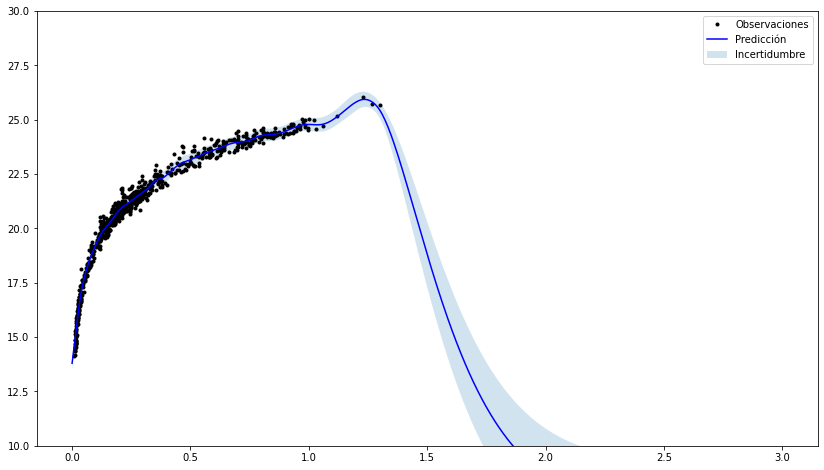

In [ ]:
# Mostrar los datos y las predicciones
with torch.no_grad():
    plt.figure(figsize=(14, 8))
    plt.plot(train_x.numpy(), train_y.numpy(), 'k.',label='Observaciones')
    plt.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b', label='Predicción')
    plt.fill_between(test_x.numpy(), observed_pred.mean.numpy() - numpy.sqrt(observed_pred.variance.numpy()), observed_pred.mean.numpy() + numpy.sqrt(observed_pred.variance.numpy()), alpha=0.2, label='Incertidumbre')
    plt.ylim((10, 30))
    plt.legend()  
    plt.show()

## **RBF Kernel**

In [ ]:
# Definir el modelo de proceso gaussiano
class GaussianProcess(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GaussianProcess, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(num_dims=1))

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Inicializar el modelo y la verosimilitud
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GaussianProcess(train_x, train_y, likelihood)

# Entrenar el modelo
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

num_iter = 100
for i in range(num_iter):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Generar predicciones
model.eval()
likelihood.eval()

with torch.no_grad():
    test_x = torch.linspace(0, 2.5, 500)
    observed_pred = likelihood(model(test_x))


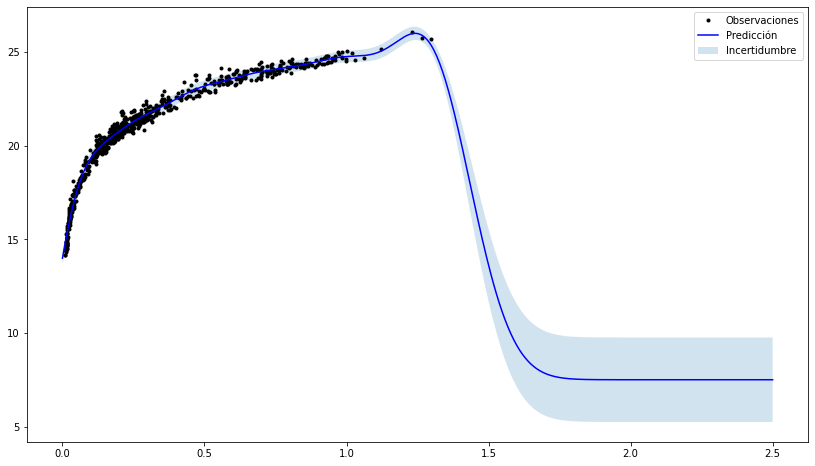

In [ ]:
# Mostrar los datos y las predicciones
with torch.no_grad():
    plt.figure(figsize=(14, 8))
    plt.plot(train_x.numpy(), train_y.numpy(), 'k.',label='Observaciones')
    plt.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b', label='Predicción')
    plt.fill_between(test_x.numpy(), observed_pred.mean.numpy() - numpy.sqrt(observed_pred.variance.numpy()), observed_pred.mean.numpy() + numpy.sqrt(observed_pred.variance.numpy()), alpha=0.2, label='Incertidumbre')
    plt.legend()  
    plt.show()

## **SpectralMixture Kernel**

In [ ]:
# Definir el modelo de proceso gaussiano
class GaussianProcess(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GaussianProcess, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.SpectralMixtureKernel(num_mixtures=2)

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Inicializar el modelo y la verosimilitud
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GaussianProcess(train_x, train_y, likelihood)

# Entrenar el modelo
model.train()
likelihood.train()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

num_iter = 100
for i in range(num_iter):
    optimizer.zero_grad()
    output = model(train_x)
    loss = -mll(output, train_y)
    loss.backward()
    optimizer.step()

# Generar predicciones
model.eval()
likelihood.eval()

with torch.no_grad():
    test_x = torch.linspace(0, 2.5, 500)
    observed_pred = likelihood(model(test_x))


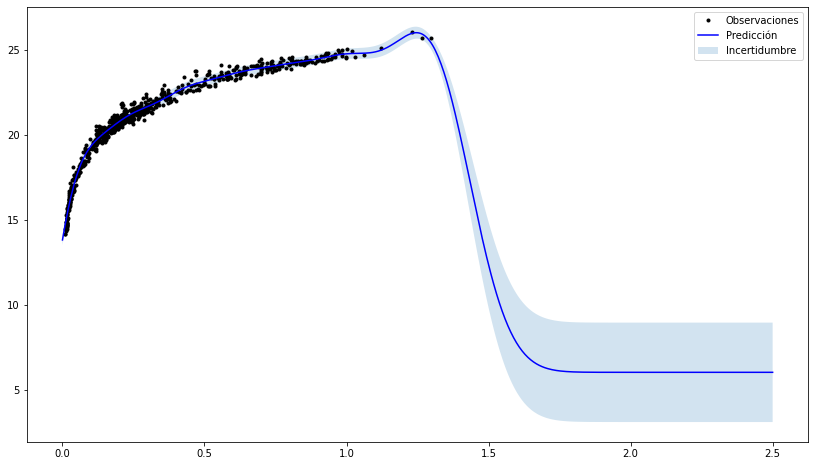

In [ ]:
# Mostrar los datos y las predicciones
with torch.no_grad():
    plt.figure(figsize=(14, 8))
    plt.plot(train_x.numpy(), train_y.numpy(), 'k.',label='Observaciones')
    plt.plot(test_x.numpy(), observed_pred.mean.numpy(), 'b', label='Predicción')
    plt.fill_between(test_x.numpy(), observed_pred.mean.numpy() - numpy.sqrt(observed_pred.variance.numpy()), observed_pred.mean.numpy() + numpy.sqrt(observed_pred.variance.numpy()), alpha=0.2, label='Incertidumbre')
    plt.legend()  
    plt.show()